In [2]:
#ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import explore, modeling, prepare, wrangle
import matplotlib.pyplot as plt

In [4]:
# Visualizing
%matplotlib inline

In [5]:
prepare.custom_visual()

In [6]:
# Load the lemonade dataset
url = 'https://gist.githubusercontent.com/ryanorsinger/19bc7eccd6279661bd13307026628ace/raw/e4b5d6787015a4782f96cad6d1d62a8bdbac54c7/lemonade.csv'
df = pd.read_csv(url)

In [ ]:
df.info()


Column: Temperature


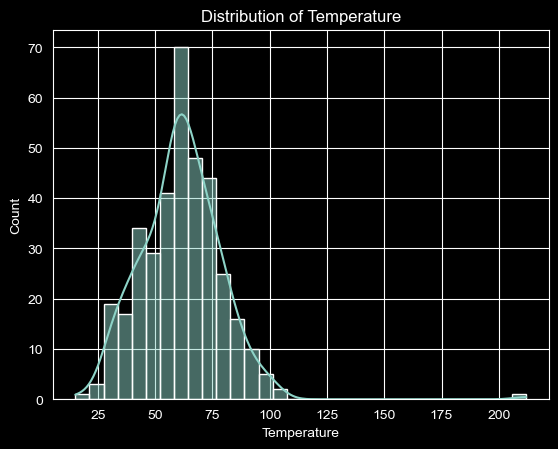


Column: Rainfall


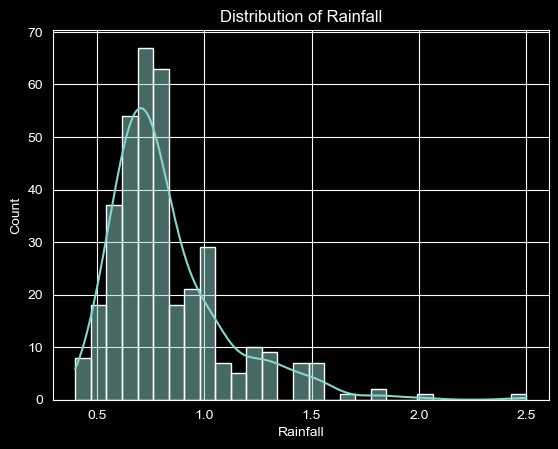


Column: Flyers


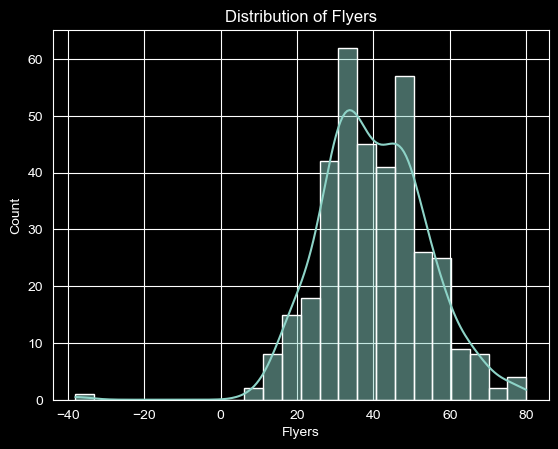


Column: Price


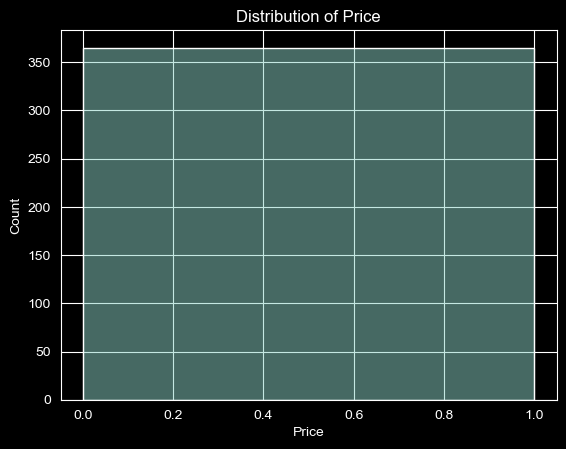


Column: Sales


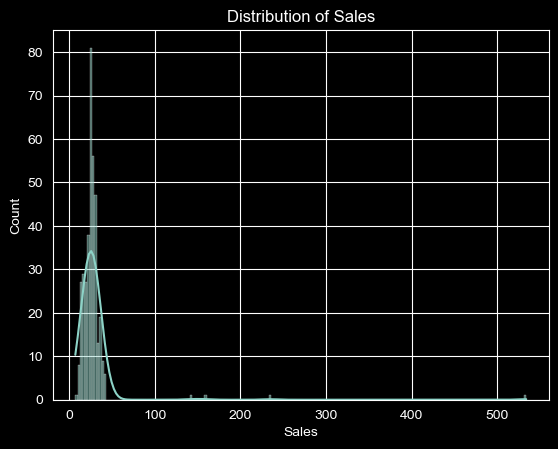

,num_rows_missing,pct_rows_missing,count,count_nulls,pct_nulls,mean,std,min,25%,50%,75%,max,dtype,distribution_type,skewness,skew_type,data_type,num_outliers,variable_type
Temperature,0.00,0.00,365.00,0,0.00,61.22,18.09,15.10,49.70,61.10,71.70,212.00,float64,Non-normal,1.54,Right,Continuous,2,numerical
Rainfall,0.00,0.00,365.00,0,0.00,0.83,0.27,0.40,0.65,0.74,0.91,2.50,float64,Non-normal,1.83,Right,Continuous,28,numerical
Flyers,0.00,0.00,365.00,0,0.00,40.10,13.79,-38.00,31.00,39.00,49.00,80.00,int64,Non-normal,-0.20,Left,Continuous,3,numerical
Price,0.00,0.00,365.00,0,0.00,0.50,0.00,0.50,0.50,0.50,0.50,0.50,float64,Non-normal,NaN,Symmetric,Discrete,0,ordinal
Sales,0.00,0.00,365.00,0,0.00,27.87,30.95,7.00,20.00,25.00,30.00,534.00,int64,Non-normal,13.19,Right,Continuous,4,numerical


In [12]:
wrangle.custom_describe(df)

In [13]:
df

,Temperature,Rainfall,Flyers,Price,Sales
0,27.00,2.00,15,0.50,10
1,28.90,1.33,15,0.50,13
2,34.50,1.33,27,0.50,15
3,44.10,1.05,28,0.50,17
4,42.40,1.00,33,0.50,18
...,...,...,...,...,...
360,42.70,1.00,33,0.50,19
361,37.80,1.25,32,0.50,16
362,39.50,1.25,17,0.50,15
363,30.90,1.43,22,0.50,13


In [8]:
df.drop(columns='Date', inplace=True)

In [9]:
df.drop(columns='Day', inplace=True)

In [10]:
df

,Temperature,Rainfall,Flyers,Price,Sales
0,27.00,2.00,15,0.50,10
1,28.90,1.33,15,0.50,13
2,34.50,1.33,27,0.50,15
3,44.10,1.05,28,0.50,17
4,42.40,1.00,33,0.50,18
...,...,...,...,...,...
360,42.70,1.00,33,0.50,19
361,37.80,1.25,32,0.50,16
362,39.50,1.25,17,0.50,15
363,30.90,1.43,22,0.50,13


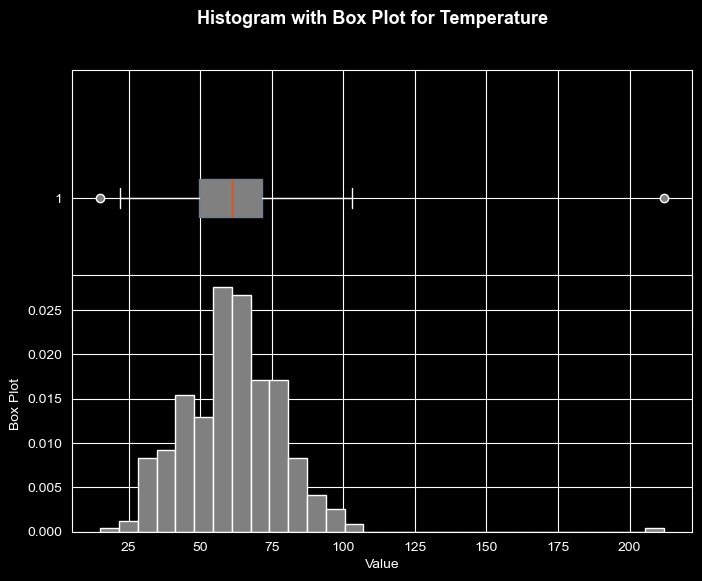

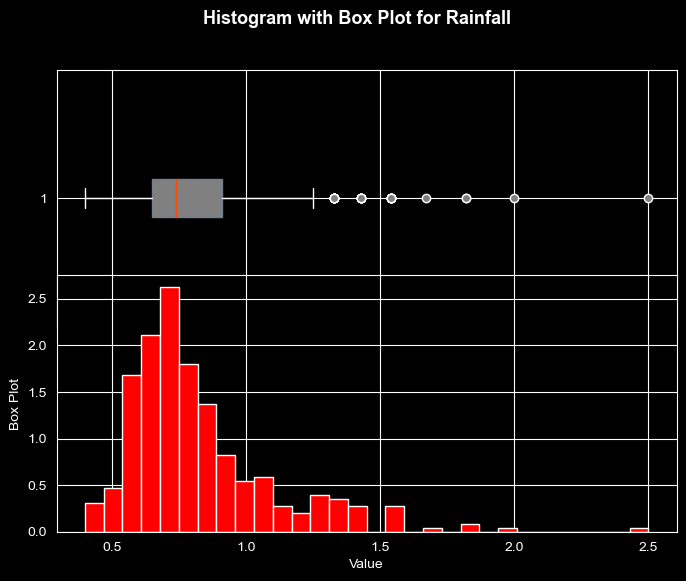

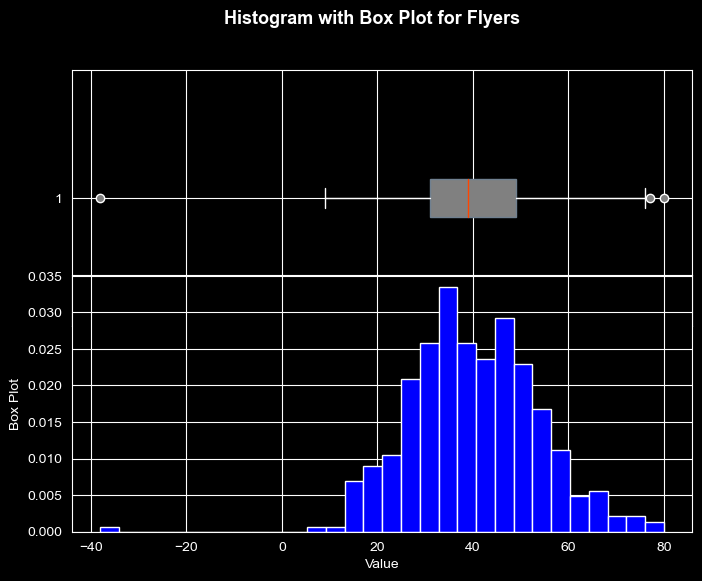

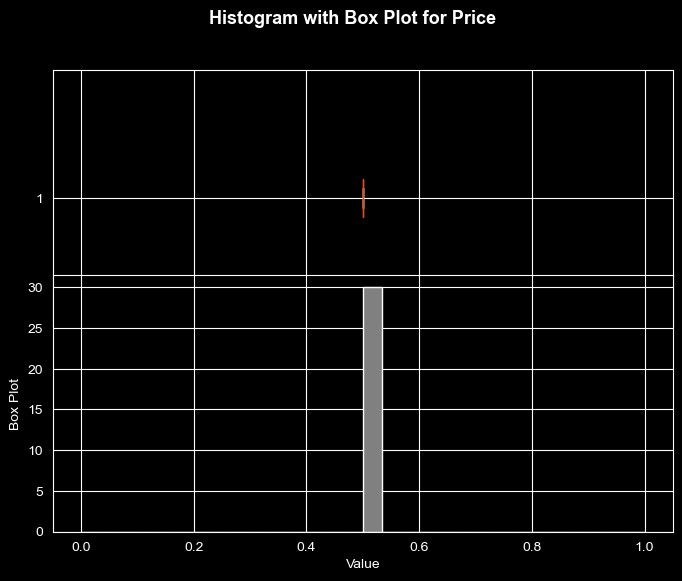

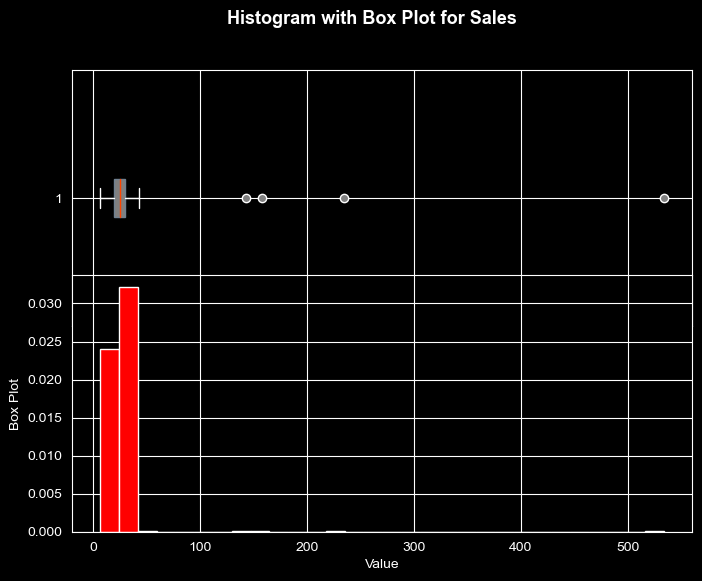

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Define a list of colors for the histograms
colors = ['gray', 'red', 'blue','gray', 'red']

# Loop through each column in the dataframe
for i, col in enumerate(df.columns):    
    fig, axs = plt.subplots(nrows=2, sharex=True, figsize=(8, 6))
    axs[1].hist(df[col], bins=30, density=True, color=colors[i])
    axs[0].boxplot(df[col], vert=False, showcaps=True, patch_artist=True, 
                    boxprops=dict(color='slategrey', facecolor='grey'), 
                    whiskerprops=dict(color='white'), 
                    medianprops=dict(color='orangered'), 
                    flierprops=dict(marker='o', markerfacecolor='grey', 
                                    markersize=6, linestyle='none'))
    
    # Remove x-axis tick labels from the histogram plot
    #axs[1].set_xticks([])
    
    # Set axis labels and title
    #axs[0].set_ylabel('Frequency')
    axs[1].set_xlabel('Value')
    axs[1].set_ylabel('Box Plot')
    fig.suptitle(f'Histogram with Box Plot for {col}', fontsize=13, fontweight='bold')

    
    # Adjust spacing between subplots
    fig.subplots_adjust(hspace=-0.2)
    
    # Show the figure
    plt.show()

In [ ]:
df[['Flyers']].min()

In [14]:
# Define a function to calculate the lower and upper bounds
def get_lower_and_upper_bounds(s, multiplier=1.5):
    q1, q3 = s.quantile([0.25, 0.75])
    iqr = q3 - q1
    lower_bound = q1 - multiplier * iqr
    upper_bound = q3 + multiplier * iqr
    return lower_bound, upper_bound

In [15]:
# Identify lower outliers using the multiplier of 1.5
for column in df.select_dtypes('number'):
    lower_bound, upper_bound = get_lower_and_upper_bounds(df[column])
    lower_outliers = df[df[column] < lower_bound][column]
    print(f"Lower outliers in {column}: {lower_outliers.values}")

Lower outliers in Temperature: [15.1]
Lower outliers in Rainfall: []
Lower outliers in Flyers: [-38]
Lower outliers in Price: []
Lower outliers in Sales: []


In [16]:
# Identify upper outliers using the multiplier of 1.5
for column in df.select_dtypes('number'):
    lower_bound, upper_bound = get_lower_and_upper_bounds(df[column])
    upper_outliers = df[df[column] > upper_bound][column]
    print(f"Upper outliers in {column}: {upper_outliers.values}")

Upper outliers in Temperature: [212.]
Upper outliers in Rainfall: [2.   1.33 1.33 1.54 1.54 1.54 1.33 1.33 1.67 1.43 1.43 1.54 1.33 1.33
 1.54 1.82 1.43 1.82 1.33 1.43 1.54 1.33 1.43 1.33 1.54 1.43 1.43 2.5 ]
Upper outliers in Flyers: [77 80]
Upper outliers in Price: []
Upper outliers in Sales: [143 158 235 534]


In [17]:
# Identify lower outliers using the multiplier of 3
for column in df.select_dtypes('number'):
    lower_bound, upper_bound = get_lower_and_upper_bounds(df[column], multiplier=3)
    lower_outliers = df[df[column] < lower_bound][column]
    print(f"Lower outliers (using multiplier of 3) in {column}: {lower_outliers.values}")

Lower outliers (using multiplier of 3) in Temperature: []
Lower outliers (using multiplier of 3) in Rainfall: []
Lower outliers (using multiplier of 3) in Flyers: [-38]
Lower outliers (using multiplier of 3) in Price: []
Lower outliers (using multiplier of 3) in Sales: []


In [18]:
# Identify upper outliers using the multiplier of 3
for column in df.select_dtypes('number'):
    lower_bound, upper_bound = get_lower_and_upper_bounds(df[column], multiplier=3)
    upper_outliers = df[df[column] > upper_bound][column]
    print(f"Upper outliers (using multiplier of 3) in {column}: {upper_outliers.values}")

Upper outliers (using multiplier of 3) in Temperature: [212.]
Upper outliers (using multiplier of 3) in Rainfall: [2.   1.82 1.82 2.5 ]
Upper outliers (using multiplier of 3) in Flyers: []
Upper outliers (using multiplier of 3) in Price: []
Upper outliers (using multiplier of 3) in Sales: [143 158 235 534]


In [19]:
# Identify normally distributed columns using Shapiro-Wilk test
from scipy.stats import shapiro
for column in df.select_dtypes('number'):
    p_value = shapiro(df[column])[1]
    if p_value >= 0.05:
        print(f"{column} is normally distributed with p-value {p_value}")
        sigma = 2
        mean, std = df[column].mean(), df[column].std()
        lower_bound, upper_bound = mean - sigma * std, mean + sigma * std
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]
        print(f"Outliers using 2 sigma rule in {column}: {outliers.values}")
        
        sigma = 3
        mean, std = df[column].mean(), df[column].std()
        lower_bound, upper_bound = mean - sigma * std, mean + sigma * std
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]
        print(f"Outliers using 3 sigma rule in {column}: {outliers.values}")

Price is normally distributed with p-value 1.0
Outliers using 2 sigma rule in Price: []
Outliers using 3 sigma rule in Price: []
